<a href="https://colab.research.google.com/github/Nameless8243/TensorFlow_DL/blob/main/02_neural_network_classification_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

## Creating data to view and fit

In [2]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now... let's visualize it!

In [5]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [6]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

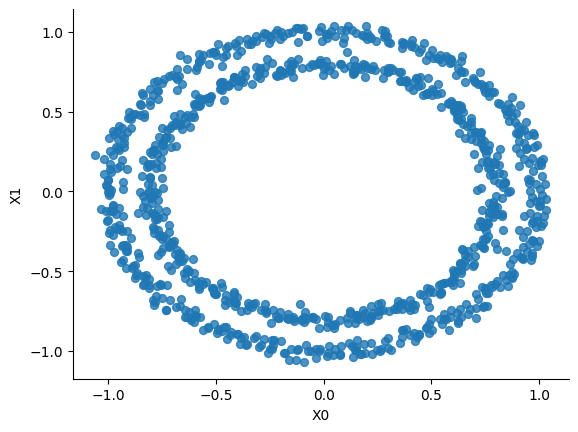

In [7]:
from matplotlib import pyplot as plt
circles.plot(kind='scatter', x='X0', y='X1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

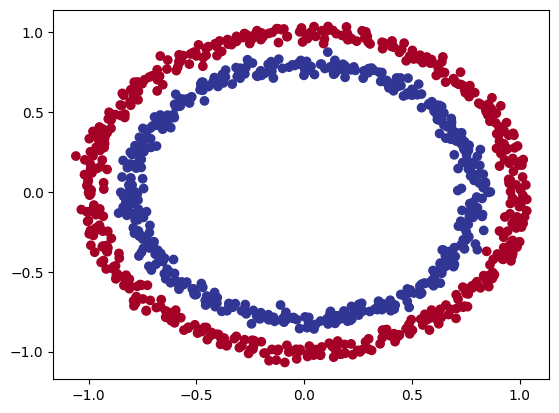

In [8]:
 # Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Input and output shapes

In [9]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [10]:
# How many samples we're working
len(X), len(y)

(1000, 1000)

In [11]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [12]:
import tensorflow as tf

In [13]:
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# 3. Fit the model
model.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 2.7397 - accuracy: 0.4790
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7366 - accuracy: 0.5000
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7069 - accuracy: 0.4920
Epoch 4/5
32/32 [==============================] - 0s 4ms/step - loss: 0.6981 - accuracy: 0.4960
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6955 - accuracy: 0.4930


In [14]:
# Let's try and improve our model by training longer...
model.fit(X, y, epochs=200, verbose=0)

In [15]:
model.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on a binary classification problem and our model is getting around ~50% accuracy... it's performing as if it's guessing.

So let's step things up a notch and add an extra layer.

In [16]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model, this time with 2 layers
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [17]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6932640671730042, 0.5]

In [18]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might to add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we might to choose a different optimization function such as Adam instead of SGD.
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer).

In [19]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neurons
    tf.keras.layers.Dense(10), # add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [20]:
# 4. Evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6984 - accuracy: 0.5000


[0.6983637809753418, 0.5]

to visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will:

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictions as well as align between zones (where each unique class falls).

In [21]:
import numpy as np

In [22]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function was inspired by two resources:
  1. https://cs231n.github.io/neural-networks-case-study/
  """
  # Define the axis boundaries of the plot and create a meshgrid
  X_min, X_max = X[:, 0].min() -0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() -0.1, X[:, 0].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(X_min, X_max, 100),
                      np.linspace(y_min, y_max, 100))

  # Create X value (we're going to make predictions on these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("Doing multi-class classification")
    # We have to reshape our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 1ms/step
doing binary classification


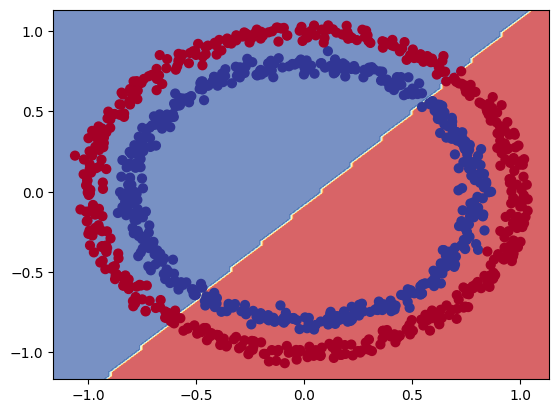

In [23]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [24]:
# Let's see if our model can be used for a regression problem...

tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(199, 1199, 5) #  y = X + 100

# Split our regression data into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_2' (type Sequential).
    
    Input 0 of layer "dense_3" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)
    
    Call arguments received by layer 'sequential_2' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=int32)
      • training=True
      • mask=None


We compiled our model for a binary classification problem.

But... we're now working on a regression problem, let's change the model to suit our data.

In [25]:
tf.random.set_seed(42)

# Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model, this time with a regression-specific loss function
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit the model
#model_4.fit(X_reg_train, y_reg_train, epochs=100)

model_4.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 4ms/step - loss: 528.3865 - mae: 528.3865
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 423.6945 - mae: 423.6945
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 322.2832 - mae: 322.2832
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 216.5203 - mae: 216.5203
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 110.6948 - mae: 110.6948
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 98.1484 - mae: 98.1484
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 114.4540 - mae: 114.4540
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 101.9617 - mae: 101.9617
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 87.0792 - mae: 87.0792
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 87.1135 - mae: 87.1135
Epoch 11/100
5/5 [===========================

2/2 [==============================] - 0s 5ms/step


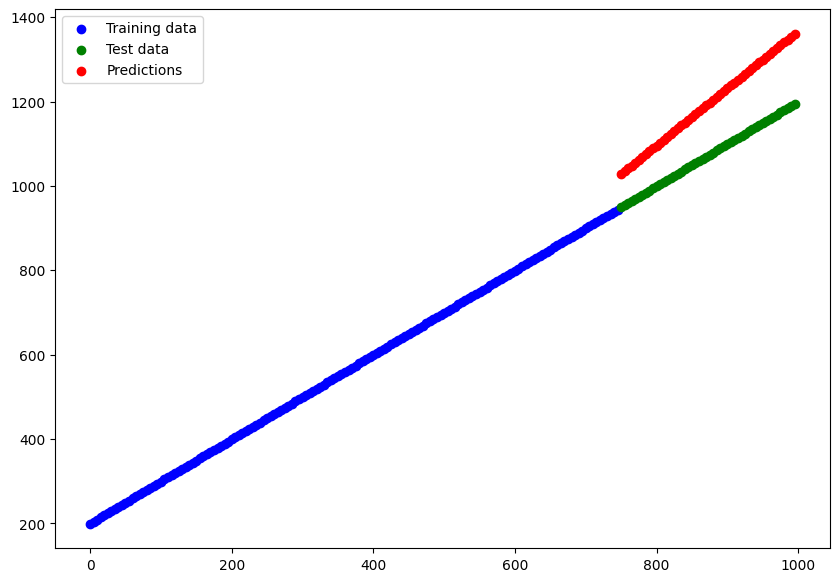

In [26]:
# Make predictions with our trained model
y_reg_preds = model_4.predict(X_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label="Training data")
plt.scatter(X_reg_test, y_reg_test, c='g', label="Test data")
plt.scatter(X_reg_test, y_reg_preds, c='r', label="Predictions")
plt.legend();

## The missing piece: Non-linearity

In [27]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_5 = tf.keras.Sequential([
     tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.6314 - accuracy: 0.4790
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.5324 - accuracy: 0.4780
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 5.5195 - accuracy: 0.4790
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 5.5165 - accuracy: 0.4800
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 5.5072 - accuracy: 0.4790
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 5.5035 - accuracy: 0.4780
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 5.5008 - accuracy: 0.4780
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.4987 - accuracy: 0.4780
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 5.4873 - accuracy: 0.4800
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 5.4548 - accuracy: 0.4820
Epoch 11/

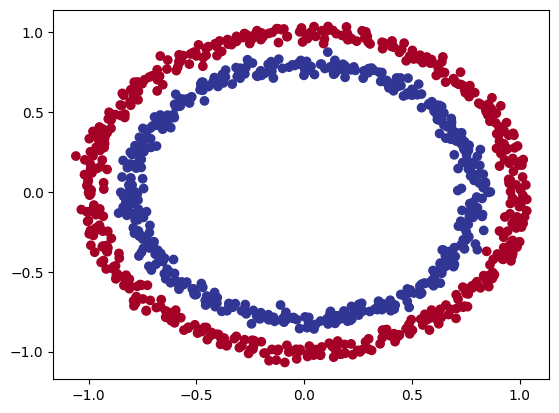

In [28]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 0s 1ms/step
doing binary classification


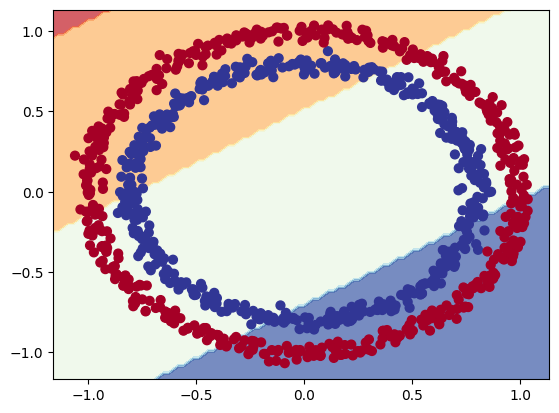

In [29]:
# Check the decision boundary for our latest model
plot_decision_boundary(model=model_5,
                       X=X,
                       y=y)

Let's try build our first neural network with a non-linear activation function.

In [30]:
# Set random seed
tf.random.set_seed(42)

# Create a model with a non-linear activation
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# Compile the model
model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])
# Fit the model
history = model_6.fit(X, y, epochs=100 )

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.9503 - accuracy: 0.4810
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9438 - accuracy: 0.4810
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9361 - accuracy: 0.4820
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9295 - accuracy: 0.4840
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9292 - accuracy: 0.4840
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9288 - accuracy: 0.4840
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9286 - accuracy: 0.4840
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9283 - accuracy: 0.4840
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9280 - accuracy: 0.4840
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.9277 - accuracy: 0.4840
Epoch 11/

In [31]:
# Time to replicate the multi-layer neural network from TensorFlow playground

# Set the random seed
tf.random.set_seed(42)

# Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# Fit the model
history = model_7.fit(X, y, epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/250
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

In [32]:
# Evaluate the model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

313/313 [==============================] - 1s 2ms/step
doing binary classification


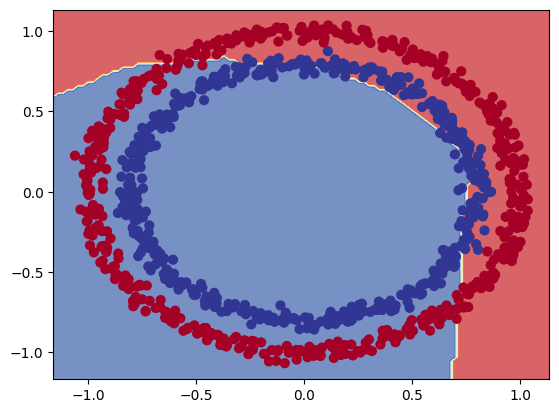

In [33]:
# How do our model predictions look?
plot_decision_boundary(model_7, X, y)

In [34]:
# Time to replicate the multi-layer neural network from TensorFlow playground

# Set the random seed
tf.random.set_seed(42)

# Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.003),
                metrics=["accuracy"])

# Fit the model
history = model_8.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6965 - accuracy: 0.5080
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.5250
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6849 - accuracy: 0.5210
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6830 - accuracy: 0.5270
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6810 - accuracy: 0.5400
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6762 - accuracy: 0.5750
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6740 - accuracy: 0.5970
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6719 - accuracy: 0.5680
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6695 - accuracy: 0.6030
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6676 - accuracy: 0.5580
Epoch 11/

In [35]:
# Evaluate the model
model_8.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0854 - accuracy: 0.9820


[0.08535654097795486, 0.9819999933242798]

313/313 [==============================] - 0s 1ms/step
doing binary classification


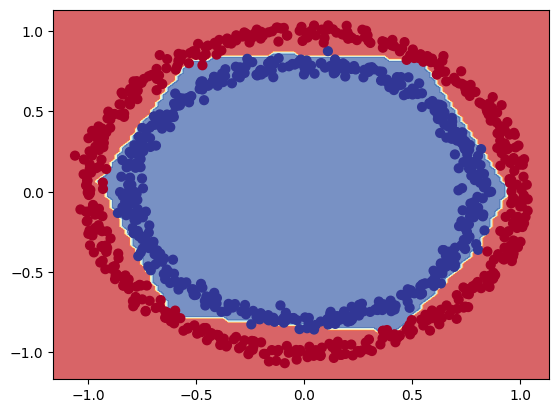

In [36]:
# Let's visualize our incredible metrics
plot_decision_boundary(model_8, X, y)

In [37]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

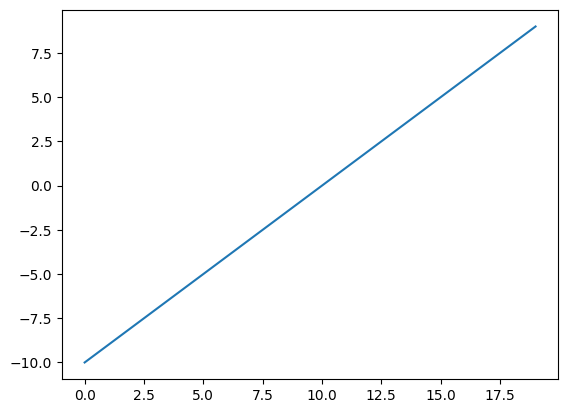

In [38]:
# Visualize our toy tensor
plt.plot(A);

In [39]:
# Let's start by replicating sigmoid - sigmoid(x) = 1 / (1 + exp(-x))
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

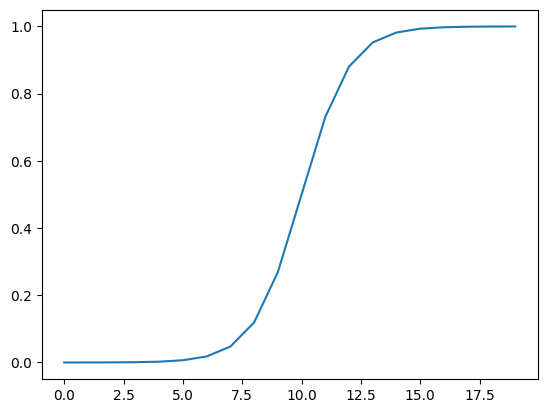

In [40]:
# plot our toy tensor transformed by sigmoid
plt.plot(sigmoid(A))

In [41]:
# Let's recreate the relu function
def relu(x):
  return tf.maximum(0, x)

# Pass our toy tensor to our custom relu function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

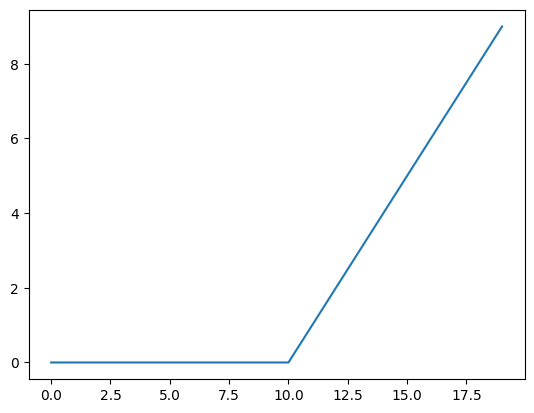

In [42]:
# Plot ReLU-modified tensor
plt.plot(relu(A))

In [43]:
# Let's try the linear activation function
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

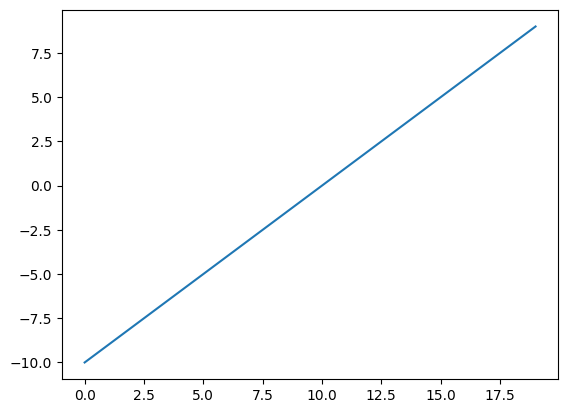

In [44]:
# Does the linear activation function change anything?
plt.plot(tf.keras.activations.linear(A))

In [45]:
# Does A even change?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

## Evaluating and improving our classification

So far we've been training and testing on the same dataset...

However, in machine learning this is basically a sin.

So let's create a training and test set.

In [46]:
# Check how many examples we have
len(X)

1000

In [47]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [70]:
# Let's recreate a model to fit the training data and evaluate on the testing data

# Set random seed
tf.random.set_seed(42)

# Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.007),
                metrics=["accuracy"])

# Fit the model
history = model_8.fit(X_train, y_train, epochs=50)

Epoch 1/50
25/25 [==============================] - 1s 3ms/step - loss: 0.6925 - accuracy: 0.5175
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6874 - accuracy: 0.5450
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.5337
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6790 - accuracy: 0.6062
Epoch 5/50
25/25 [==============================] - 0s 3ms/step - loss: 0.6749 - accuracy: 0.5487
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6697 - accuracy: 0.5475
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6637 - accuracy: 0.5763
Epoch 8/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6595 - accuracy: 0.6025
Epoch 9/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6525 - accuracy: 0.6438
Epoch 10/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6448 - accuracy: 0.5813
Epoch 11/50
25/25 [

In [71]:
# Evaluate
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0553 - accuracy: 1.0000


[0.055268917232751846, 1.0]

313/313 [==============================] - 0s 1ms/step
doing binary classification
313/313 [==============================] - 0s 1ms/step
doing binary classification


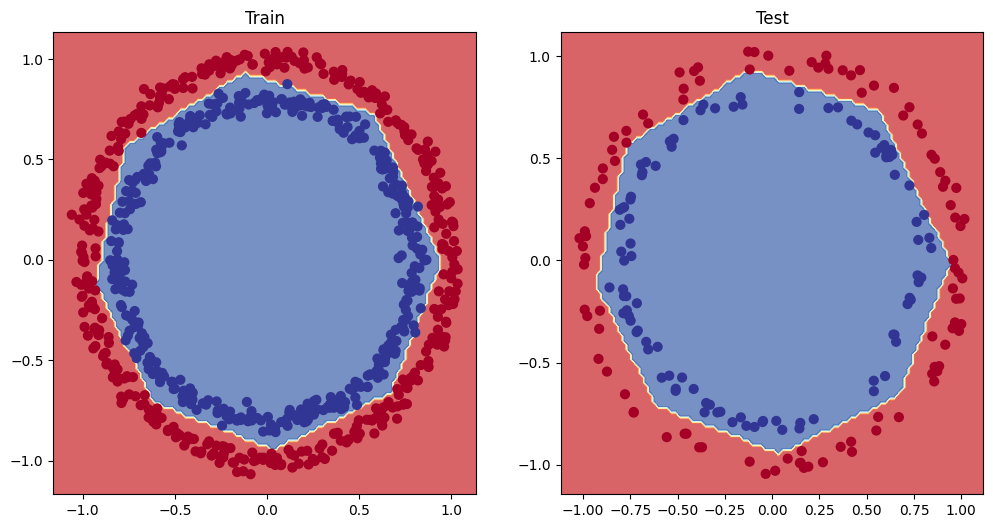

In [72]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # We want to create a subplot, 1row, 2col, 1st value will be the training plot
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)  # We want a second subplot, it is going to be "Test"
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()